## Cargar archivo

In [9]:
import pandas as pd

df = pd.read_csv('../Dataset/dataset.csv')

df.head()

,bedrooms,bathrooms,area,zipcode,bathroom_image,bedroom_image,kitchen_image,frontal_image,price
0,4,4.0,4053,85255,1_bathroom.jpg,1_bedroom.jpg,1_kitchen.jpg,1_frontal.jpg,869500
1,4,3.0,3343,36372,2_bathroom.jpg,2_bedroom.jpg,2_kitchen.jpg,2_frontal.jpg,865200
2,3,4.0,3923,85266,3_bathroom.jpg,3_bedroom.jpg,3_kitchen.jpg,3_frontal.jpg,889000
3,5,5.0,4022,85262,4_bathroom.jpg,4_bedroom.jpg,4_kitchen.jpg,4_frontal.jpg,910000
4,3,4.0,4116,85266,5_bathroom.jpg,5_bedroom.jpg,5_kitchen.jpg,5_frontal.jpg,971226


## Normalizar datos categoricos

In [10]:
# Normalizar sacando la media y dividiendo por la desviación estándar
df['bedrooms'] = (df['bedrooms'] - df['bedrooms'].mean()) / df['bedrooms'].std()
df['bathrooms'] = (df['bathrooms'] - df['bathrooms'].mean()) / df['bathrooms'].std()
df['area'] = (df['area'] - df['area'].mean()) / df['area'].std()
df['zipcode'] = (df['zipcode'] - df['zipcode'].mean()) / df['zipcode'].std()

# Ver los primeros registros
df.head()

,bedrooms,bathrooms,area,zipcode,bathroom_image,bedroom_image,kitchen_image,frontal_image,price
0,0.536137,1.341651,1.378536,-0.795699,1_bathroom.jpg,1_bedroom.jpg,1_kitchen.jpg,1_frontal.jpg,869500
1,0.536137,0.336704,0.798734,-7.640277,2_bathroom.jpg,2_bedroom.jpg,2_kitchen.jpg,2_frontal.jpg,865200
2,-0.325224,1.341651,1.272375,-0.794159,3_bathroom.jpg,3_bedroom.jpg,3_kitchen.jpg,3_frontal.jpg,889000
3,1.397499,2.346599,1.353220,-0.794719,4_bathroom.jpg,4_bedroom.jpg,4_kitchen.jpg,4_frontal.jpg,910000
4,-0.325224,1.341651,1.429983,-0.794159,5_bathroom.jpg,5_bedroom.jpg,5_kitchen.jpg,5_frontal.jpg,971226


## Visualizar tamaño de imagenes

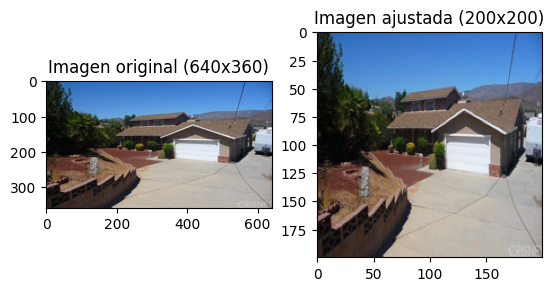

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Ruta de la imagen objetivo
imagen = '../Dataset/Houses-dataset/Houses Dataset/309_frontal.jpg'

# Abrir la imagen
im = Image.open(imagen)

# Ajustar el tamaño de la imagen
im_resized = im.resize((200, 200))

# Configurar subplots para mostrar imágenes una al lado de la otra
plt.subplot(1, 2, 1)
plt.title(f'Imagen original ({im.size[0]}x{im.size[1]})')
plt.imshow(im)

plt.subplot(1, 2, 2)
plt.title(f'Imagen ajustada ({im_resized.size[0]}x{im_resized.size[1]})')
plt.imshow(im_resized)

plt.show()


## Ajustar tamaños de imagenes

In [12]:
# Ajustar el tamaño de todas las imagenes
import os

def ajustar_tamaño(ruta_imagen: str):
    """
    Ajusta el tamaño de una imagen.

    Parámetros:
        imagen (str): El nombre de la imagen.
        ancho (int): El ancho deseado.
        alto (int): El alto deseado.
    Return:
        None
    """

    # Abrir la imagen
    im = Image.open(ruta_imagen)

    # Ajustar el tamaño de la imagen
    im = im.resize((200, 200))

    # Crear carpeta si no existe
    if not os.path.exists('../Dataset/imagenes_ajustadas'):
        os.makedirs('../Dataset/imagenes_ajustadas')

    # Guardar la imagen en carpeta diferente
    nombre_imagen = ruta_imagen.split('/')[-1]
    im.save(f"../Dataset/imagenes_ajustadas/{nombre_imagen}")

# Ejemplo de uso
# ajustar_tamaño('Houses-dataset/Houses Dataset/310_frontal.jpg')

In [13]:
import os
from tqdm import tqdm

# Filtrar archivos con extensión .jpg
imagenes = [archivo for archivo in os.listdir('../Dataset/Houses-dataset/Houses Dataset/') if archivo.endswith('.jpg')]
print(f"Se encontraron {len(imagenes)} imágenes")

# Ajustar el tamaño de todas las imagenes
for imagen in tqdm(imagenes):
    ajustar_tamaño(f'../Dataset/Houses-dataset/Houses Dataset/{imagen}')

print(f"Se ajustaron {len(imagenes)} imágenes")

Se encontraron 2140 imágenes


  0%|          | 0/2140 [00:00<?, ?it/s]

100%|██████████| 2140/2140 [00:30<00:00, 69.29it/s] 

Se ajustaron 2140 imágenes


In [15]:
# Ver dimensiones de foto
im = Image.open('../Dataset/imagenes_ajustadas/390_frontal.jpg')

im.size

(200, 200)

## Guardar archivo csv

In [42]:
df.to_csv('../Dataset/dataset_normalizado.csv', index=False)

In [3]:
df_normalizado = pd.read_csv('../Dataset/dataset_normalizado.csv')
df_normalizado.head()

,bedrooms,bathrooms,area,zipcode,price,bathroom_image,bedroom_image,kitchen_image,frontal_image
0,0.536137,1.341651,1.378536,-0.795699,869500,1_bathroom.jpg,1_bedroom.jpg,1_kitchen.jpg,1_frontal.jpg
1,0.536137,0.336704,0.798734,-7.640277,865200,2_bathroom.jpg,2_bedroom.jpg,2_kitchen.jpg,2_frontal.jpg
2,-0.325224,1.341651,1.272375,-0.794159,889000,3_bathroom.jpg,3_bedroom.jpg,3_kitchen.jpg,3_frontal.jpg
3,1.397499,2.346599,1.353220,-0.794719,910000,4_bathroom.jpg,4_bedroom.jpg,4_kitchen.jpg,4_frontal.jpg
4,-0.325224,1.341651,1.429983,-0.794159,971226,5_bathroom.jpg,5_bedroom.jpg,5_kitchen.jpg,5_frontal.jpg
